# Exploratory Data Analysis

### This dataset *movies_full.csv* is downloaded to GitHub: https://github.com/nastazya/Movies-analytics/tree/master/data

In [1]:
# import the library
%matplotlib inline

import ast
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

# apply style to all the charts
sns.set_style('whitegrid')

# convert scientific notation to decimals
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', 24)

In [2]:
df = pd.read_csv('data/movies_full.csv')
df['release_date'] = pd.to_datetime(df['release_date'])
print(df.dtypes)

id                               int64
title                           object
budget                           int64
revenue                        float64
release_date            datetime64[ns]
popularity                     float64
vote_average                   float64
genres                          object
production_companies            object
cast                            object
keywords                        object
dtype: object


In [3]:
#Setting cast, production_companies, genres and keywords types to a list of dictionaries

df['genres'] = df['genres'].astype(str)
df['production_companies'] = df['production_companies'].astype(str)
df['cast'] = df['cast'].astype(str)
df['keywords'] = df['keywords'].astype(str)

df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x))
df['production_companies'] = df['production_companies'].apply(lambda x: ast.literal_eval(x))
df['cast'] = df['cast'].apply(lambda x: ast.literal_eval(x))
df['keywords'] = df['keywords'].apply(lambda x: ast.literal_eval(x))

#checking results
cell = df['genres'][100]
print('\nGenres cell: ', type(cell), '. \nCell[0]: ', cell[0], ': ', type(cell[0]))

cell = df['production_companies'][100]
print('\nProduction_companies cell: ', type(cell), '. \nCell[0]: ', cell[0], ': ', type(cell[0]))

cell = df['cast'][100]
print('\nCast cell: ', type(cell), '. \nCell[0]: ', cell[0], ': ', type(cell[0]))

cell = df['keywords'][100]
print('\nKeywords cell: ', type(cell), '. \nCell[0]: ', cell[0], ': ', type(cell[0]))


Genres cell:  <class 'list'> . 
Cell[0]:  {'id': 35, 'name': 'Comedy'} :  <class 'dict'>

Production_companies cell:  <class 'list'> . 
Cell[0]:  {'name': 'Canal+', 'id': 5358} :  <class 'dict'>

Cast cell:  <class 'list'> . 
Cell[0]:  {'cast_id': 7, 'character': 'Xavier', 'credit_id': '52fe46ccc3a36847f8112def', 'gender': 2, 'id': 46919, 'name': 'Thomas F. Duffy', 'order': 0, 'profile_path': '/jLANWUvY91SUNcBfB4z7PQUieE7.jpg'} :  <class 'dict'>

Keywords cell:  <class 'list'> . 
Cell[0]:  {'id': 9778, 'name': 'exploding building'} :  <class 'dict'>


In [4]:
df.head(10)

,id,title,budget,revenue,release_date,popularity,vote_average,genres,production_companies,cast,keywords
0,57186,Skinning,500000,198.00,2010-10-06,1.02,5.90,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","[{'name': 'Hypnopolis', 'id': 51316}]","[{'cast_id': 1001, 'character': 'Novica', 'cre...","[{'id': 379, 'name': 'skinhead'}, {'id': 7492,..."
1,70805,Sunday,450,288.00,1997-08-27,0.30,6.30,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...","[{'name': 'Sunday Productions', 'id': 40423}, ...","[{'cast_id': 2, 'character': 'Oliver / Matthew...","[{'id': 1821, 'name': 'sunday'}, {'id': 8508, ..."
2,108923,The Mysterious Lady,337,551.00,1928-08-04,0.77,7.50,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...","[{'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8...","[{'cast_id': 1, 'character': 'Tania Fedorova',...","[{'id': 154802, 'name': 'silent film'}, {'id':..."
3,53863,Star of Midnight,280,831.00,1935-04-19,0.11,5.30,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'name': 'RKO Radio Pictures', 'id': 6}]","[{'cast_id': 4, 'character': 'Clay 'Dal' Dalze...","[{'id': 733, 'name': 'dancer'}, {'id': 163110,..."
4,44895,Poor White Trash,1200000,1404.00,2000-06-16,0.58,3.90,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...","[{'name': 'Kingsize Entertainment', 'id': 36242}]","[{'cast_id': 2, 'character': 'Sandy Lake', 'cr...","[{'id': 572, 'name': 'sex'}, {'id': 798, 'name..."
5,81048,Running Time,130000,1596.00,1997-12-18,0.47,6.20,"[{'id': 80, 'name': 'Crime'}]","[{'name': 'Blood Money Partners LP', 'id': 160...","[{'cast_id': 1, 'character': 'Carl', 'credit_i...","[{'id': 10051, 'name': 'heist'}, {'id': 12999,..."
6,98339,The Samaritan,12000000,2521.00,2012-03-02,11.52,5.20,"[{'id': 53, 'name': 'Thriller'}]","[{'name': 'Quickfire Films', 'id': 4186}, {'na...","[{'cast_id': 1, 'character': 'Foley', 'credit_...","[{'id': 378, 'name': 'prison'}, {'id': 572, 'n..."
7,35610,Philadelphia Experiment II,5000000,2970.00,1993-11-12,1.16,5.00,"[{'id': 878, 'name': 'Science Fiction'}]","[{'name': 'Trimark Pictures', 'id': 4063}]","[{'cast_id': 2, 'character': 'David Herdeg', '...","[{'id': 4379, 'name': 'time travel'}, {'id': 1..."
8,94901,About Cherry,2500000,3003.00,2012-02-14,5.47,4.40,"[{'id': 18, 'name': 'Drama'}]",[{'name': 'Gordon Bijelonic / Datari Turner Fi...,"[{'cast_id': 1, 'character': 'Angelina', 'cred...","[{'id': 445, 'name': 'pornography'}]"
9,89691,ATM,3000000,3010.00,2012-02-17,8.95,5.10,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...","[{'name': 'Buffalo Gal Pictures', 'id': 11517}...","[{'cast_id': 2, 'character': 'Emily', 'credit_...","[{'id': 157145, 'name': 'atm'}, {'id': 157146,..."


## Data Perspective
- One variable
    - Numeric variables
        - continuous: average income
        - discrete: population
    - Categorical variables
        - ordinal: grade
        - nominal: house, apartment, townhouse, etc.
- Multiple variables
    - Numeric x Numeric
    - Categorical x Numeric
    - Categorical x Categorical

## One Variable (numeric)

count        4714.00
mean     27327869.00
std      29326492.00
min           113.00
25%       6000000.00
50%      18000000.00
75%      38000000.00
max     152000000.00
Name: budget, dtype: float64


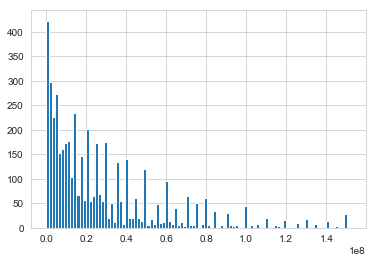

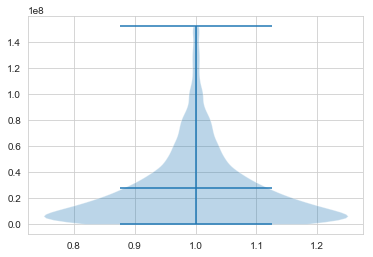

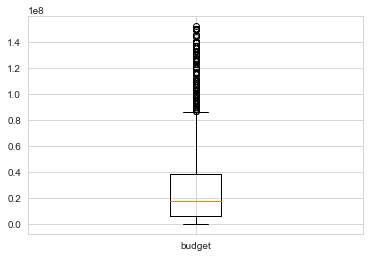

In [5]:
# Analize pricing distribution

# Histogram
print(df['budget'].describe().round())
plt.hist(df['budget'], bins=100)
plt.show()
# Violin and box plot
plt.violinplot(df['budget'], showmeans=True)
plt.show()
plt.boxplot(df['budget'])
plt.xticks([1], ['budget'], rotation='horizontal')
plt.show()

In [6]:
#TODO: Analyze all the numerical variables

## One Variable (categorical)

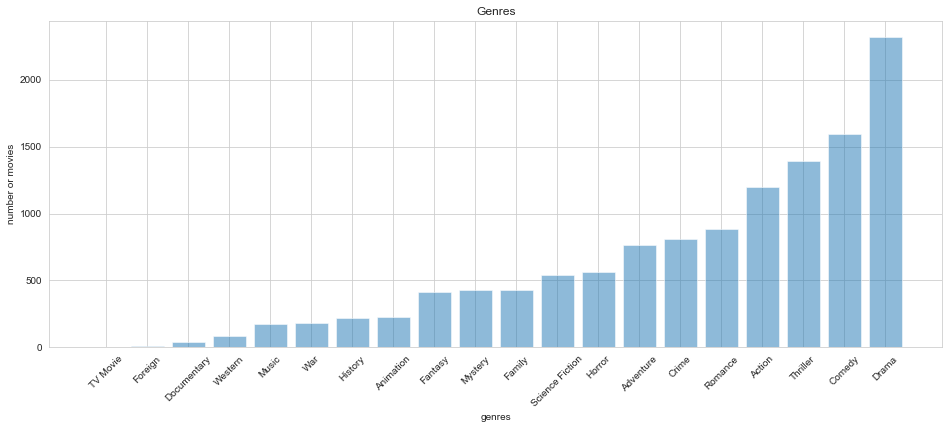

In [7]:
# Analize genres
l=[]
for i, item in enumerate(df['genres']):
    for cell in item:
        l.append(cell['name'])
genres_all = np.array(l) 
g_name, g_count = np.unique(genres_all, return_counts=True)
genres = zip(g_name, g_count) # list of Unique Values along with occurrence Count
genres = list(genres)
genres = sorted(genres, key = lambda x: x[1]) 
for i, elem in enumerate(genres):
    g_name[i] = elem[0]
    g_count[i] = elem[1]

# Bar Chart
plt.figure(figsize=(16,6))
plt.title('Genres')
plt.xlabel('genres')
plt.ylabel('number or movies')
y_pos = range(len(g_name))
plt.bar(y_pos,g_count, align='center', alpha=0.5)
plt.xticks(y_pos, g_name, rotation=45)
plt.show()

In [8]:
#TODO: Analyze all the categorical variables

## Multiple variables (Numeric x Numeric)

In [9]:
# Correlation
df.corr()

,id,budget,revenue,popularity,vote_average
id,1.00,-0.05,-0.04,0.13,-0.01
budget,-0.05,1.00,0.63,0.23,-0.13
revenue,-0.04,0.63,1.00,0.34,0.11
popularity,0.13,0.23,0.34,1.00,0.18
vote_average,-0.01,-0.13,0.11,0.18,1.00


In [10]:
# heatmap


In [11]:
# Visualization : correlation between Price x SQFT


In [12]:
# TODO: Create a scatterplot Price x Mean Income
# TODO: What is the correlation between Price x Mean Income


In [13]:
# Box plot to show the distribution between bedrooms x price


## Multiple variables (Categorical x Numeric)

## Multiple variables (Categorical x Categorical)

In [14]:
# Count of number of houses by zipcode and bedrooms


# From raw value to percentage


# plot


# Show graphic


## Business Perspective
"An approximate answer to the right question is worth a great deal more than a precise answer to the wrong question." John Tukey

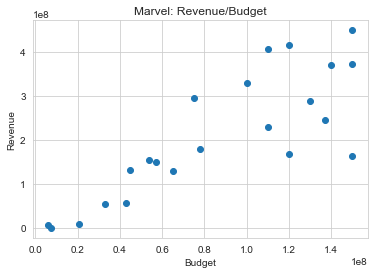

In [29]:
# Show the budget/revenue curve for Marvel Productions
index_marvel=[]
for i, item in enumerate(df['production_companies']):
    for cell in item:                                   #cell is a dictionary object
        if 'Marvel' in cell['name']:
            index_marvel.append(i)
            break
df_marvel = df.loc[index_marvel, :]
df_marvel.sort_values(by='budget')
df_marvel.reset_index(drop=True, inplace=True)

#mylambda = lambda mylist, x: [mylist.index(item) if x in item] for item in mylist
#df_test = df.iloc[mylambda(df['title'],'Sun')]
#df_test

#mylambda = lambda mylist, x: mylist.index(x) if x in [cell['name'] for cell in item] for i, item in mylist  else False
#df_marvel = df.iloc[mylambda(df['production_companies'],'Marvel')]
#df_marvel

#from matplotlib.pyplot import subplots, show
fig, ax = subplots()
ax.plot(df_marvel['budget'], df_marvel['revenue'], 'o')
ax.set_xlabel("Budget")
ax.set_ylabel("Revenue")
ax.set_title("Marvel: Revenue/Budget");
show()

In [16]:
# What is the total sales ($) per month?





(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

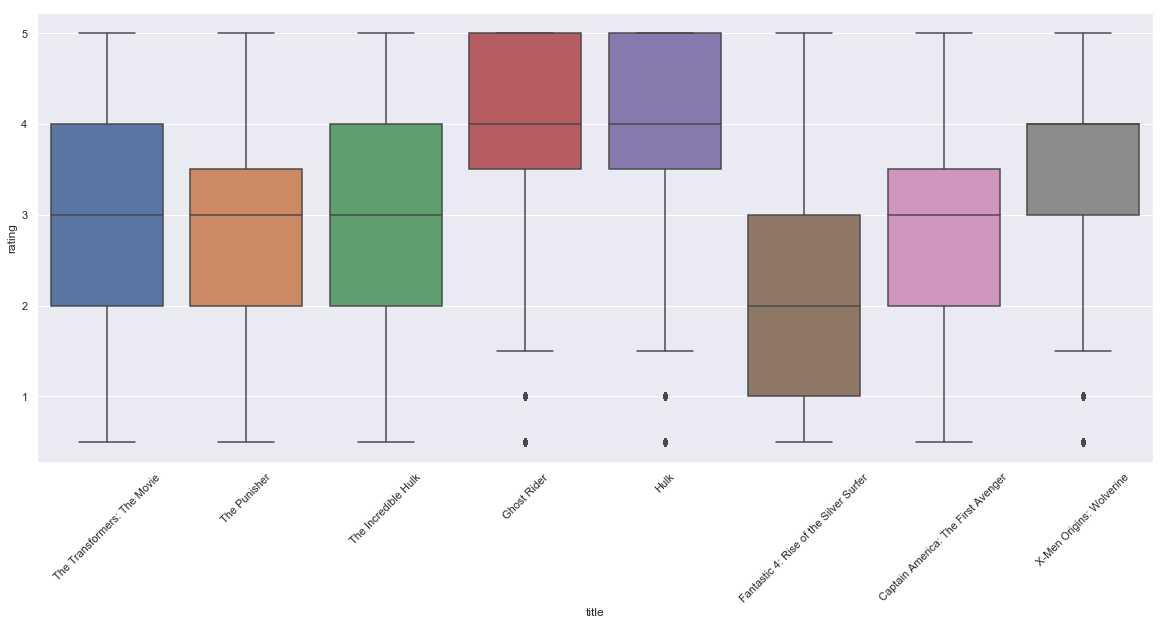

In [52]:
# Show the raitings for each Marvel movie
marvel = df_marvel[['id','title']]
ratings = pd.read_csv('data/ratings.csv')
ratings.rename(columns={'movieId':'id'}, inplace=True)
del_index = ratings[ratings['rating'] == 0].index
ratings.drop(del_index, inplace=True)
ratings.reset_index(drop=True, inplace=True)

marvel = marvel.merge(ratings, on='id', how='inner')

sns.set(rc={'figure.figsize':(20,8.27)})
sns.boxplot(x=marvel['title'], y=marvel['rating'])
plt.xticks(rotation=45)

In [18]:
# What is the average price by zip code?


In [19]:
# Identify the zip codes with highest and lowest price per square foot


In [20]:
# Is the grade a good indicator of price?


In [21]:
# Is the walking score a good indicator of price?
